### 차트 작성 시 한글 깨짐 방지를 위한 koreanize-matplotlib 설치

In [1]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.7 MB/s eta 0:00:00


### 라이브러리 import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### 1. 데이터 로드 및 분할

In [3]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']

In [4]:
# Feature(X)와 Target(y) 분리
X = df.drop('target', axis=1)
y = df['target']

# 학습용/테스트용 데이터 분할 (8:2)
# stratify=y: 타겟 클래스 비율 유지 (강의자료 강조 사항)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"학습 데이터: {X_train.shape}")
print(f"테스트 데이터: {X_test.shape}")

학습 데이터: (455, 30)
테스트 데이터: (114, 30)


### 2. 데이터 전처리

In [6]:
# 데이터 스케일링 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3. 최적의 K 탐색 (교차 검증)

In [7]:
# 탐색할 K의 범위 설정 (1부터 30까지 홀수만)
k_range = range(1, 31, 2)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 5-fold 교차 검증 수행 후 평균 정확도 저장
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# 최적의 K 찾기
optimal_k = k_range[np.argmax(cv_scores)]
print(f">> 최적의 K (Optimal K): {optimal_k}")
print(f">> 최고 교차 검증 정확도: {max(cv_scores):.4f}")

>> 최적의 K (Optimal K): 3
>> 최고 교차 검증 정확도: 0.9692


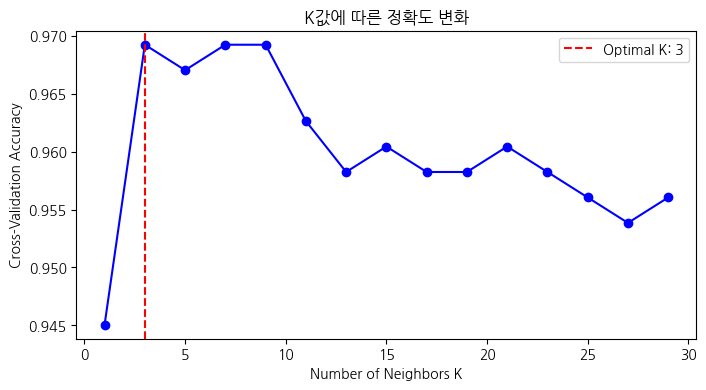

In [8]:
# K값에 따른 정확도 변화 시각화
plt.figure(figsize=(8, 4))
plt.plot(k_range, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validation Accuracy')
plt.title('K값에 따른 정확도 변화')
plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal K: {optimal_k}')
plt.legend()
plt.show()

### 4. 모델 학습 및 평가

In [9]:
# 최적의 K로 모델 생성 및 학습
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best.fit(X_train_scaled, y_train)

# 테스트 데이터 예측
y_pred = knn_best.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 데이터 정확도: {accuracy:.4f}")

# 상세 리포트
print("\n[Classification Report]")
print(classification_report(y_test, y_pred, target_names=['No cancer (0)', 'cancer (1)']))

테스트 데이터 정확도: 0.9825

[Classification Report]
               precision    recall  f1-score   support

No cancer (0)       1.00      0.95      0.98        42
   cancer (1)       0.97      1.00      0.99        72

     accuracy                           0.98       114
    macro avg       0.99      0.98      0.98       114
 weighted avg       0.98      0.98      0.98       114

